# Session 12b - Text Mining
## Analysing and summarising collections of text
### Named Entity Recognition

Having learned how to clean and simplify our text for processing, the next stage is to ask what our text is about. This workbook looks at extracting "Entities" from our Text using SpaCy.

In [1]:
import pandas as pd
import spacy

In [2]:
df = pd.read_csv('sample_news_large.csv')

In [3]:
df.head()

,query,title,text,published,site
0,Hong Kong,Horrifying view of fires from space,Video Image Satellite images show insane view ...,2019-11-08T23:51:00.000+02:00,news.com.au
1,Hong Kong,Protester shot with live round in Hong Kong as...,\n Chief Executive addresses the press after c...,2019-11-11T02:00:00.000+02:00,scmp.com
2,Hong Kong,China imposes online gaming curfew for minors ...,Hong Kong (CNN) China has announced a curfew o...,2019-11-06T02:00:00.000+02:00,cnn.com
3,Hong Kong,Trump made 96 false claims last week - CNNPoli...,Washington (CNN) President Donald Trump was re...,2019-10-30T20:35:00.000+02:00,cnn.com
4,Hong Kong,50 best breads around the world | CNN Travel,(CNN) — What is bread? You likely don't have t...,2019-10-16T07:02:00.000+03:00,cnn.com


## Top Entities (Named Entity Recognition)

Named entity recognition (NER) is the technique of extracting key entities within a piece of text,
- people
- places
- organisations
- dates
- values
- currencies etc.

SpaCy's processing examines each word in context and uses this to predict which tokens likely refer to particular types of entities like people, organisations, dates etc. It is not using any limited list or reference to "look up" these entities, but instead identifies them based on contextual cues.


In [4]:
nlp = spacy.load('en_core_web_md')

In [5]:
trump = nlp("""A New York judge has ordered President Donald Trump to pay $2m (£1.6m)"""\
            """ for misusing funds from his charity to finance his 2016 political campaign."""\
            """ The Donald J Trump Foundation closed down in 2018. Prosecutors had accused it"""\
            """ of working as "little more than a chequebook" for Mr Trump's interests."""\
            """ Charities such as the one Mr Trump and his three eldest children headed cannot"""\
            """ engage in politics, the judge ruled.""")

# Source: https://www.bbc.co.uk/news/world-us-canada-50338231

In [6]:
# we can access the entities with the .ents attribute
trump.ents

(New York,
 Donald Trump,
 $2m,
 £1.6m,
 2016,
 The Donald J Trump Foundation,
 2018,
 Trump,
 one,
 Trump,
 three)

In [7]:
# every object in the entities list has a text attribute and a label attribute to tell you the type of entity it is.

for entity in trump.ents:
    print( entity.text, entity.label_ )

New York GPE
Donald Trump PERSON
$2m MONEY
£1.6m MONEY
2016 DATE
The Donald J Trump Foundation ORG
2018 DATE
Trump PERSON
one CARDINAL
Trump PERSON
three CARDINAL


In [10]:
# as we're in Jupyter we can also use SpaCy's built in visualiser

spacy.displacy.render(trump, style='ent', jupyter=True)

In [11]:
# if you want to save the annotated version of the
# text you can save to html using this function.

def save_displacy_to_html(doc, filename, style='ent'):
    html_data = spacy.displacy.render(doc, style='ent', jupyter=False, page=True)
    with open(filename, 'w+', encoding="utf-8") as f:
        f.write(html_data)

save_displacy_to_html(trump, 'test.html', style='ent')

In [12]:
# lets create a function that can extract specific types of entities from a text

def entity_extractor(nlp_doc, entity_type=None):
    if entity_type is None:
        ents = [ent.text for ent in nlp_doc.ents]
    else:
        ents = [ent.text for ent in nlp_doc.ents if ent.label_ == entity_type.upper()]
    unique = list(set(ents))
    return unique

In [18]:
entity_extractor(trump, entity_type='person')

['Donald Trump', 'Trump']

In [19]:
docs = nlp.pipe(df['text'])
people = [entity_extractor(doc, entity_type='person') for doc in docs]

In [20]:
people[:10]

[['pic.twitter.com/AlgiOgAHQI\n',
  'Matt Hope',
  'Rappville',
  'Rob Rogers',
  'Shane Fitzsimmons',
  'Dakota Smith',
  'bush',
  '— Dakota Smith (@weatherdak)'],
 ['Chan Ho-him',
  'Kwai Fong',
  'Kimmy Chung',
  'Kathleen Magramo',
  'Chow Tsz-lok',
  'Victor Ting',
  'Karen Zhang',
  'Carrie Lam Cheng Yuet',
  'Sum Lok-kei',
  'Kwan O',
  'Joanne Ma',
  'Nicola Chan'],
 [],
 ['Kim',
  'Bush',
  'James Clapper',
  'Richard Nixon',
  'bin Laden',
  'Fu Cong',
  'Adam Schiff',
  'Andrew Wheeler',
  'Comey',
  'Ivanka',
  'Robert Mueller',
  'Howard Stern',
  'Ivanka Trump',
  'Mavericks',
  'Stephen Moore',
  'Conor Lamb',
  'Sgt',
  'Sidney Powell',
  'Derek Scissors',
  'Mark Zaid',
  'Schiff',
  'Obama',
  'Herbert Hoover',
  'Dean Baquet',
  'Mitchell Warren',
  'Sean Hannity',
  'Brad Karkkainen',
  'Hillary',
  'Trump',
  'Julián Castro',
  'Rudy Giuliani',
  'Flynn',
  'Hannity',
  'Sentier',
  'Barack Obama',
  'William Barr',
  'Osama bin Laden',
  'Zelensky',
  'Paul Manaf

In [21]:
df['people'] = people
df['people']

0      [pic.twitter.com/AlgiOgAHQI\n, Matt Hope, Rapp...
1      [Chan Ho-him, Kwai Fong, Kimmy Chung, Kathleen...
2                                                     []
3      [Kim, Bush, James Clapper, Richard Nixon, bin ...
4      [karavai, Getty Images, Pan Cubano, Roti gamba...
                             ...                        
170    [Marcus, Lyft, Steven Mnuchin, Benoit Tessier,...
171    [Steven Mnuchin, Carson, Ben Carson, Rayburn B...
172    [Andrew Harnik, David Solomon, Cheung, Bill Gu...
173    [Donald Trump, Facebook, Xi, Jerome Powell, Tr...
174    [Warren, Mark Zuckerberg, Yang, Bernie Sanders...
Name: people, Length: 175, dtype: object

In [22]:
df.head()

,query,title,text,published,site,people
0,Hong Kong,Horrifying view of fires from space,Video Image Satellite images show insane view ...,2019-11-08T23:51:00.000+02:00,news.com.au,"[pic.twitter.com/AlgiOgAHQI\n, Matt Hope, Rapp..."
1,Hong Kong,Protester shot with live round in Hong Kong as...,\n Chief Executive addresses the press after c...,2019-11-11T02:00:00.000+02:00,scmp.com,"[Chan Ho-him, Kwai Fong, Kimmy Chung, Kathleen..."
2,Hong Kong,China imposes online gaming curfew for minors ...,Hong Kong (CNN) China has announced a curfew o...,2019-11-06T02:00:00.000+02:00,cnn.com,[]
3,Hong Kong,Trump made 96 false claims last week - CNNPoli...,Washington (CNN) President Donald Trump was re...,2019-10-30T20:35:00.000+02:00,cnn.com,"[Kim, Bush, James Clapper, Richard Nixon, bin ..."
4,Hong Kong,50 best breads around the world | CNN Travel,(CNN) — What is bread? You likely don't have t...,2019-10-16T07:02:00.000+03:00,cnn.com,"[karavai, Getty Images, Pan Cubano, Roti gamba..."


In [26]:
# most mentioned people
df.explode('people')['people'].value_counts()[:10]

Donald Trump        30
Trump               23
Mark Zuckerberg     22
Boris Johnson       15
Johnson             11
Elizabeth Warren    11
Zuckerberg           9
Joe Biden            8
Hillary Clinton      8
David Marcus         8
Name: people, dtype: int64

In [27]:
# top ten people per group
for query,data in df.groupby('query'):
    print(f"****{query}****")
    print(data.explode('people')['people'].value_counts()[:10])
    print()

****Hong Kong****
Donald Trump            6
Carrie Lam              5
Chow Tsz-lok            3
Mike Pompeo             2
Kwan O                  2
Kimmy Chung             2
Xi Jinping              2
Trump                   2
Abu Bakr al-Baghdadi    2
Joe Biden               2
Name: people, dtype: int64

****Tesla****
Elon Musk              4
Facebook               2
Cambridge Analytica    2
Deepak Chopra          2
Grete Suarez           2
Musk                   2
Trump                  2
Dan Ives               2
Vivek Arya             1
Teresa                 1
Name: people, dtype: int64

****alt-right****
Trump              8
Donald Trump       7
Breitbart          7
Richard Spencer    5
Steve Bannon       4
Katie McHugh       4
Stephen Miller     4
McHugh             4
Miller             4
Jeff Sessions      3
Name: people, dtype: int64

****billionaire****
Donald Trump            9
Trump                   8
David Cay Johnston’s    6
Bill Gates              5
Hillary Clinton       

In [30]:
to_plot = df.explode('people').groupby('people', as_index=False).count().nlargest(10,'text')
to_plot

,people,query,title,text,published,site
331,Donald Trump,30,30,30,30,30
1266,Trump,23,23,23,23,23
836,Mark Zuckerberg,22,22,22,22,22
170,Boris Johnson,15,15,15,15,15
369,Elizabeth Warren,11,11,11,11,11
648,Johnson,11,11,11,11,11
1371,Zuckerberg,9,9,9,9,9
181,Breitbart,8,8,8,8,8
296,David Marcus,8,8,8,8,8
518,Hillary Clinton,8,8,8,8,8


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

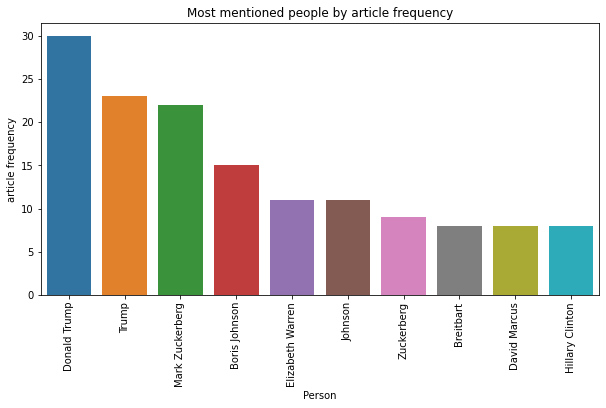

In [32]:
# seaborn plot here 
sns.barplot(data=to_plot, x='people', y='title')


fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.xlabel('Person')
plt.ylabel('article frequency')
plt.title('Most mentioned people by article frequency')
plt.xticks(rotation=90)
plt.show()

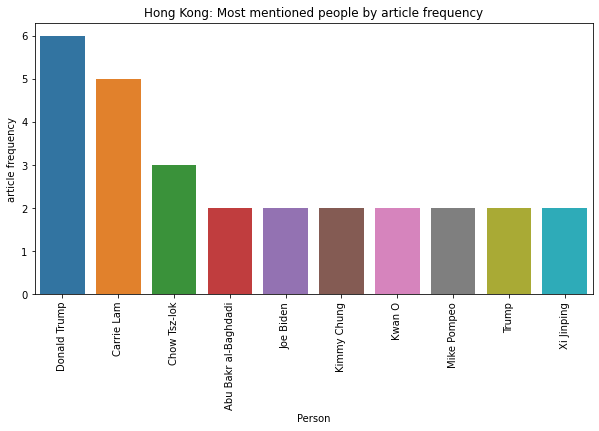

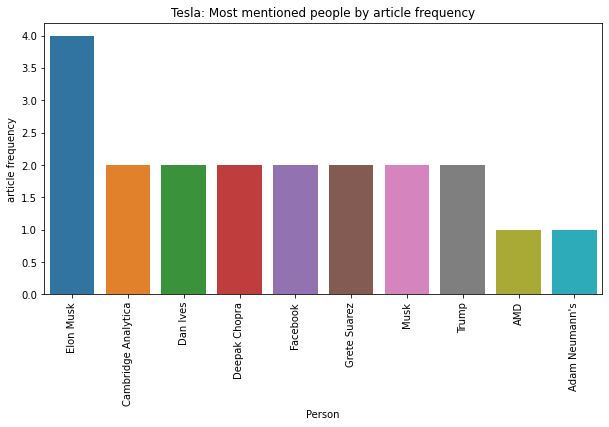

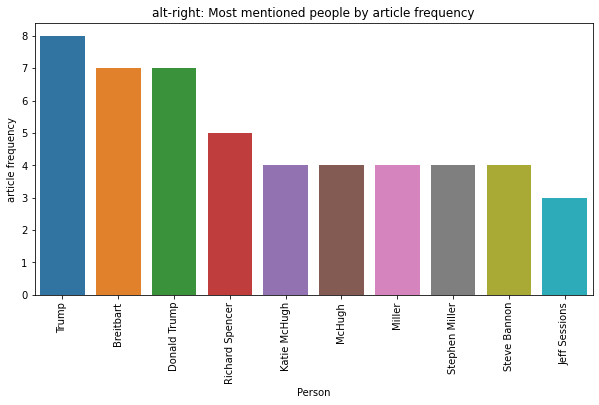

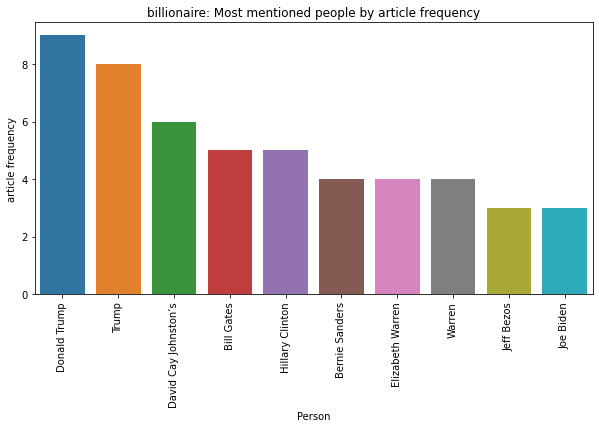

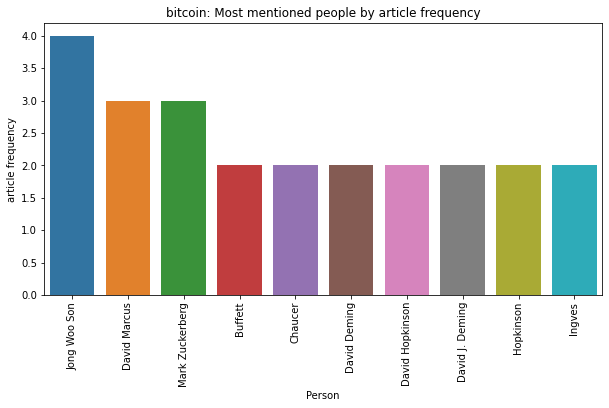

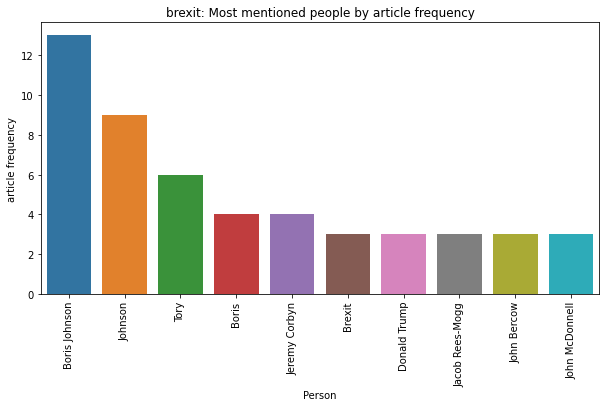

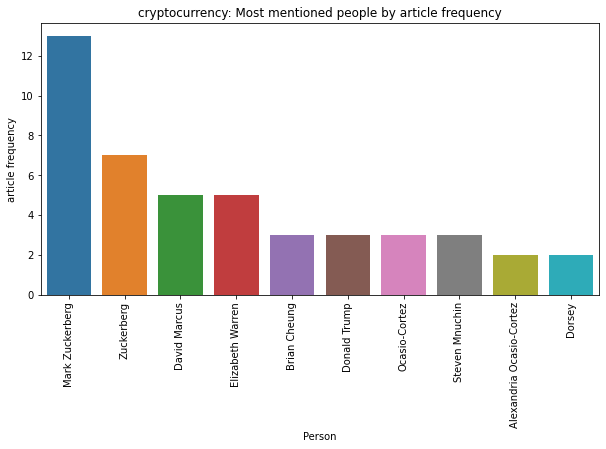

In [33]:
# grouped by query
for query, data in df.groupby('query'):
    to_plot = data.explode('people').groupby('people', as_index=False).count().nlargest(10, 'title')
    
    sns.barplot(data=to_plot, x='people',y='title')

    fig = plt.gcf()
    fig.set_size_inches(10, 5)

    plt.xlabel('Person')
    plt.ylabel('article frequency')
    plt.title(f'{query}: Most mentioned people by article frequency')
    plt.xticks(rotation=90)
    plt.show()